In [232]:
import warnings
warnings.filterwarnings('ignore')
import time 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from IPython.display import Image 
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler #정규화(정해진 규칙 기준, min-max 기준)
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import *


In [233]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [234]:
type(iris) #dic을 wrapping. class 

sklearn.utils.Bunch

In [235]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [236]:
iris.data #ndarray는 2차원 리스트를 래핑해놓은 클래스 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [237]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [238]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [239]:
len(iris.data)

150

In [240]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [241]:
df = pd.DataFrame(data = iris.data,  #2ndarray
                 columns = iris.feature_names #리스트 
     )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [242]:
df['species'] = iris.target

In [243]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [245]:
df['species'] = df['species'].astype('category')

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [247]:
df['species'] = df['species'].cat.rename_categories(iris.target_names)
df['species']
##라벨인코딩은 abc 순서대로 되어 있기 때문에, abc순서대로 rename된다. 

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [248]:
df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [249]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [250]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

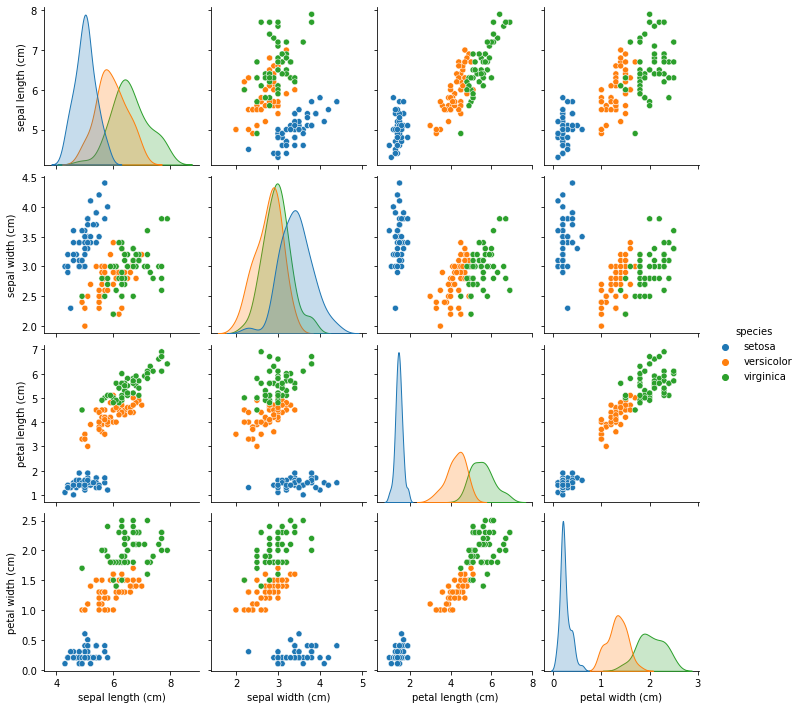

In [251]:
## pairplot 
sns.pairplot(df, hue='species')

In [252]:
## virginica, versicolor 

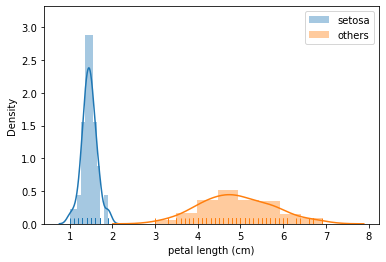

In [253]:
sns.distplot(df[df.species=="setosa"]["petal length (cm)"], hist =True, rug = True, label = 'setosa')
sns.distplot(df[df.species!="setosa"]["petal length (cm)"], hist =True, rug = True, label = 'others')
plt.legend()

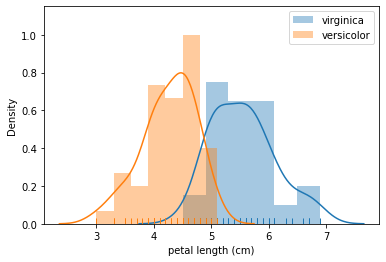

In [254]:
#virginica, versicolor 
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist = True, rug = True, label = "virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist = True, rug = True, label = "versicolor")
plt.legend()

In [255]:
##setosa가 꽃잎의 길이가 제일 짧다. virginica가 제일 길다. 
##꽃잎의 길이 1.5 전 후 짧은 것은 모두다 setosa이다. 
##virginica가 veriscolor보다는 꽃잎의 길이가 약간 긴 편이지만, 절대적인 기준은 아니다 
##종을 판별하기 위한 절대적인 기준은 되지 않는다. 

In [256]:
##petal width, 3개의 품종을 비교 

<AxesSubplot:xlabel='petal width (cm)', ylabel='Density'>

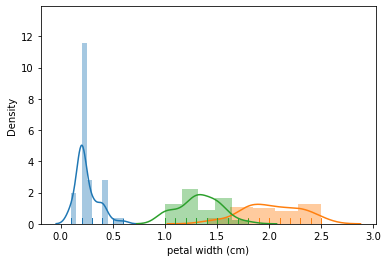

In [257]:
sns.distplot(df[df.species == "setosa"]["petal width (cm)"], hist = True, rug = True, label = "setosa")
sns.distplot(df[df.species == "virginica"]["petal width (cm)"], hist = True, rug = True, label = "virginica")
sns.distplot(df[df.species == "versicolor"]["petal width (cm)"], hist = True, rug = True, label = "versicolor")

In [258]:
#꽃잎의 너비를 비교 결과, setosa가 제일 작은 꽃임 
#전체적인 꽃잎의 크기는 virginica가 제일 크다 
#꽃잎의 너비가 다른 꽃보다 상대적으로 많이 setosa가 작으므로 
#꽃잎의 너비 1미만은 모두 setosa 
#꽃잎의 너비는 iris의 품종을 분류하기에 적합한 항목이 됨. 

In [259]:
from pandas.plotting import parallel_coordinates

Text(0, 0.5, 'features values')

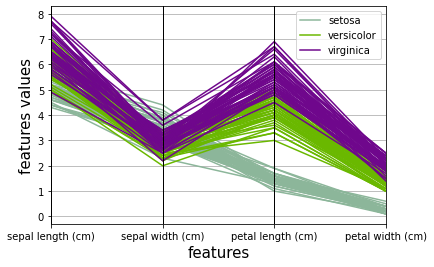

In [260]:
parallel_coordinates(df, 'species')
plt.xlabel('features', fontsize = 15)
plt.ylabel('features values', fontsize = 15)

In [261]:
##petal width, petal length는 학습의 중요 속성이 될 예정이므로 사용 
##sepal width, sepal length는 구분의 중요 속성이 아니므로 제거해도 될 것 같음. 

In [262]:
# sepal length, sepal width 각각 항목별로 꽃들이 어떤 차이를 가지는지 값의 범위를 
#표준화시켜 비교해보자 

In [263]:
ss = StandardScaler() #표준(평균값 기준)

In [264]:
#표준화를 기준으로 인코딩을 하려고 함. 
#fit -> transform, fit_trainsform 

In [265]:
test_list = [1,2,3]

In [266]:
test_list[:-1]
test_list[-1]

3

In [267]:
ss.fit_transform(df.iloc[:,:-1])[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [323]:
X_train_m, X_test_m, y_train_m, y_test_m =  train_test_split(
                                        df.iloc[:,:-1],#문제, 
                                        df.iloc[:,-1],#정답, 
                                        test_size = 0.2,#테스트 비율, 
                                        random_state = 42#랜덤 시드값 
                                )

In [324]:
print('train data:', X_train.shape, y_train.shape)
print('test data:', X_test.shape, y_test.shape )

train data: (120, 4) (120,)
test data: (30, 4) (30,)


In [325]:
y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30],
           dtype='int64')

In [326]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [327]:
y_test.value_counts()

virginica     11
setosa        10
versicolor     9
Name: species, dtype: int64

In [328]:
##스케일링 할 때, 전체 데이터나 훈련데이터로 평균(fit)를 시키고, 
#절대 검증 데이터로 fit시키면 안 된다. 
#훈련데이터와 검증데이터의 스케일링 기준이 달라지기 때문에 

In [329]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_train_s.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603


In [330]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
X_test_s.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.354517,-0.585060,0.557775,0.022248
1,-0.133071,1.650837,-1.161395,-1.179118
2,2.304867,-1.032239,1.818500,1.490583
3,0.232620,-0.361470,0.443164,0.422703
4,1.207795,-0.585060,0.615081,0.289218


In [331]:
ms = MinMaxScaler()

In [332]:
X_train_ms = pd.DataFrame(ms.fit_transform(X_train), columns=X_train.columns)
X_train_ms.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.088235,0.666667,0.000000,0.041667
1,0.411765,1.000000,0.087719,0.125000
2,0.705882,0.458333,0.596491,0.541667
3,0.147059,0.583333,0.105263,0.041667
4,0.029412,0.500000,0.052632,0.041667


In [333]:
X_test_ms = pd.DataFrame(ms.transform(X_test), columns=X_test.columns)
X_test_ms.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.529412,0.333333,0.649123,0.458333
1,0.411765,0.750000,0.122807,0.083333
2,1.000000,0.250000,1.035088,0.916667
3,0.500000,0.375000,0.614035,0.583333
4,0.735294,0.333333,0.666667,0.541667


In [334]:
ms_df_values = ms.fit_transform(df.iloc[:,:-1])
ms_df_values[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [335]:
ms_df = pd.DataFrame(data = ms_df_values,columns=iris.feature_names)
ms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [336]:
ms_df['species'] = iris.target
ms_df['species'] = ms_df['species'].astype('category')
ms_df['species'] = ms_df['species'].cat.rename_categories(iris.target_names)
ms_df['species'][:3]

0    setosa
1    setosa
2    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Text(0, 0.5, 'features values')

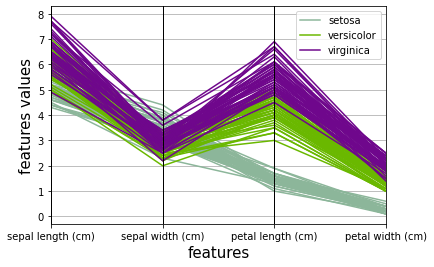

In [337]:
##
parallel_coordinates(df, 'species')
plt.xlabel('features', fontsize = 15)
plt.ylabel('features values', fontsize = 15)

<AxesSubplot:>

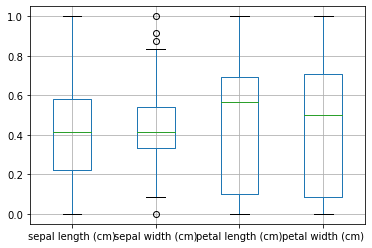

In [338]:
ms_df.boxplot()

In [339]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
#cross_val_score: 다양한 샘플링을 해서 여러 번 테스트 ->평균치를 구해본다 
from sklearn.metrics import *

In [340]:
knn = KNeighborsClassifier()

In [341]:
id(knn) #id는 주소  참조형 knn

2382356796552

In [342]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [343]:
#교차 검증 
#샘플링을 10개해서, 10번 검증을 해보세요! 의미 
#X_train을 train data + validation data
#cv(fold값)가 10이면 validation data를 X_train의 1/10로 잡음 
#validation data의 개수는 12개, 나머지가 train_data 

scores = cross_val_score(knn, X_train, y_train, cv = 10)  #cv는 폴드 값 
print(scores)

[0.91666667 1.         0.91666667 1.         0.83333333 0.83333333
 1.         1.         1.         0.91666667]


In [344]:
type(scores) #1차원 ndarray는 리스트 

numpy.ndarray

In [345]:
np.mean(scores)

0.9416666666666667

In [346]:
def print_metrics(model,x,y,k): 
    scores2 = cross_val_score(model,x,y,cv=k)#cv = fold값 
  #  print('교차 검증 결과:\n{:.2f}'.format(scores))
    #acc_mean = np.mean(scores)
    print(len(list(scores2)))
    print('교차 검증 결과\n{}'.format(list(scores2)))
   # print('교차 검증 평균:\n{:.2f}'.format(acc_mean))
    acc_mean2 = np.mean(scores2)
    print('교차검증 평균\n{:.2f}'.format(acc_mean2))
    #pred = model.predict()
    return scores2, acc_mean2
    

In [347]:
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

1.0

5
교차 검증 결과
[0.9583333333333334, 0.9583333333333334, 0.8333333333333334, 1.0, 0.9583333333333334]
교차검증 평균
0.94


(array([1., 0., 0., 0., 0., 0., 0., 3., 0., 1.]),
 array([0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        ]),
 <BarContainer object of 10 artists>)

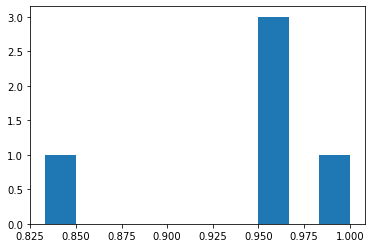

In [348]:
sc2 , am2 = print_metrics(knn, X_train, y_train, 5)
plt.hist(sc2)

10
교차 검증 결과
[0.9166666666666666, 1.0, 0.9166666666666666, 1.0, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 0.9166666666666666]
교차검증 평균
0.94


(array([2., 0., 0., 0., 3., 0., 0., 0., 0., 5.]),
 array([0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        ]),
 <BarContainer object of 10 artists>)

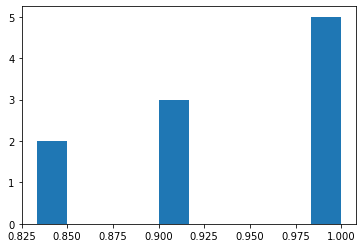

In [349]:
sc3 , am3 = print_metrics(knn, X_train, y_train, 10)
plt.hist(sc3)

In [350]:
##모델링 선정할 때 , 다양한 모델을 교차검증을 통해서 대략적으로 선정 

In [351]:
#대략적인 모델 2-3개를 선정했다고 가정 
#모델마다 최적의 하이퍼 파라미터가 무엇인지 찾아주는 것이 
#grid search 

In [352]:
grid_params = { 
    'n_neighbors': list(range(1,20)), #19개 
    'weights': ["uniform","distance"], #가중치  2개 
    'metric': ['euclidean', 'manhattan', 'minkowski']#3개 
}# 19 * 2 * 3개 
#fold = 5, 19*2*3*5

In [353]:
GridSearchCV(knn, grid_params, cv = 5)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [354]:
gs_model = GridSearchCV(knn, grid_params , cv = 5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [355]:
gs_model.best_estimator_ 
#estimator(평가자, 예측자, 최적의 하이퍼파라미터가 적용된 우리가 만든 모델)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [356]:
gs_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

In [357]:
gs_model.best_score_

0.9666666666666666

In [362]:
gs_model = GridSearchCV(knn, grid_params, cv = 5)
gs_model.fit(X_train_m, y_train_m)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [363]:
gs_model.best_estimator_ 

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [364]:
gs_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

In [365]:
gs_model.best_score_ 

0.9666666666666666

In [366]:
##그리드 서치를 통해서 최적의 파라미터를 찾았음. 

In [367]:
#{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}
best_knn_m = KNeighborsClassifier(
            metric= 'manhattan',
            n_neighbors= 14,
            weights = 'uniform'
)
best_knn_m.fit(X_train, y_train)

pred4 = best_knn_m.predict(X_test) #모의고사 =>작성한 답 
acc4 = accuracy_score(y_test, pred4) #작성한 답과 실제 답안지 비교 
acc4

1.0

In [395]:
def print_test_metrics(model, X_test, y_test): 
    print('***Test data Accuracy ***')
    pred3 = best_knn.predict(X_test) #모의고사 =>작성한 답 
    acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제 답안지 비교 
    print('{:2f}'.format(acc3))
    print('***Confusion Matrix***')
    print(confusion_matrix(y_test, pred3)) 
    print('***Confusion Matrix(con)***')
    print(precision_score(y_test, pred3, average = 'macro'))
    print('***classification report***')
    print(classification_report(y_test, pred3))
    

In [396]:
print_test_metrics(knn, X_test, y_test)

***Test data Accuracy ***
1.000000
***Confusion Matrix***
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
***Confusion Matrix(con)***
1.0
***classification report***
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [397]:
##정확도는 100점 
##혼동행렬결과 3가지 분류를 완벽하게 함 
##다음의 혼동행렬을 분석해보세요 
#**Confusion Matrix***
#setosa, versicolor', 'virginica'

#           'setosa', 'versicolor', 'virginica'
#setosa         [[7        2            1]
#versicolor     [2         6            1]
#virginica      [1         4            6]]
#한 열은 estimator가 예측한 값  
#한 행은 실제 값 
#실제 값이 setosa인데, 예측한 값이 setosa로 예측한 것이 7
#                                 versicolor로 예측한 것이 2 
#                                 virginica로 예측한 것이 1 
#정확도는(accuracy ) ?  


In [372]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [374]:
total = [7,2,1,2,6,1,1,4,6]
rint(sum(total))#총 개수 
#print(len(total)) 

30
9


In [375]:
correct = [7,6,6] 
print(sum(correct)) #맞힌 개수 

19


In [376]:
print(19/30*100) #정확도 

63.33333333333333


In [378]:
#confusion matrix를 가지고, 2가지를 생각해 볼 수 있다. 
#원래 실제값 중에서 어떤 것을 맞추고, 어떤 것을 못맞추었는지??
#예측한 값 중에서 어떤 것을 맞추고, 어떤 것을 못맞추었지?? 

In [380]:
# accuracy / precision / recall 
# avg(f-score) 

In [384]:
## regression(회귀): 숫자값을 예측하는 것 
## 컴퓨터는 정확한 값을 예측 불가능 
## 회귀의 정확도를 구할 때, 실제값과 얼마나 가깝게 맞추었는가로 평가
##잘못 맞춘 경우 (실제값과 예측갑싱 먼 경우)오차가 크다라고 표현 
##좋은 모델은 오차가 작아야 합니다. (여기서 오차는 값이 먼 정도)
##거리를 재서 오차를 확인 =>숫자가 +, -가 나오므로 
#절대값을 씌우거나 제곱(루트)을 해서 오차를 계산 
#RMSE 